In [ ]:
import pip
pip.main(["install","matplotlib"])
pip.main(["install","numpy"])

In [331]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys

In [343]:
approach_to_fpath_dict = {"KKT": ["c:\\tmp\\logs\\gap_vs_time\\Pop_2_2022_6_12_19_44_2_510\\kkt_Pop.txt"],
                        #   "Simulated Annealing": ["c:\\tmp\\logs\\Pop_2_2022_6_13_3_51_20_106\\simulatedannealing_Pop.txt",
                        #                           "c:\\tmp\\logs\\Pop_2_2022_6_13_8_58_38_604\\simulatedannealing_Pop.txt"],
                          "Simulated Annealing": ["c:\\tmp\\logs\\gap_vs_time\\Pop_2_2022_6_13_11_8_49_993\\simulatedannealing_Pop.txt"],
                          "Hill Climber": ["c:\\tmp\\logs\\gap_vs_time\\Pop_2_2022_6_12_22_46_42_289\\hillclimbing_Pop.txt"],
                          "Random": ["c:\\tmp\\logs\\gap_vs_time\\Pop_2_2022_6_12_19_44_2_510\\randomSearch_Pop.txt"],}
approach_to_dur_gap_mapping = dict()


In [70]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [345]:
max_gap = 0
for approach, fpath_list in approach_to_fpath_dict.items():
    gap_list = []
    dur_list = []
    for fpath in fpath_list:
        with open(fpath, "r") as fp:
            for fline in fp.readlines():
                dur_ms, gap = fline.split(",")
                gap = float(gap)
                gap_list.append(gap)
                dur_list.append(int(dur_ms) / 1000)
                max_gap = np.maximum(max_gap, gap)
    gap_list = np.array(gap_list)
    dur_list = np.array(dur_list)
    sort_idx = np.argsort(dur_list)
    approach_to_dur_gap_mapping[approach] = [dur_list[sort_idx], gap_list[sort_idx]]
print("max_gap:", max_gap)
# print(approach_to_dur_gap_mapping)

max_gap: 84999.99999977267


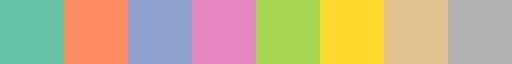

In [168]:
color_pallette = plt.get_cmap("Set2")
color_pallette

In [169]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0)]
line_styles = ["-", "-", "-", "-"]

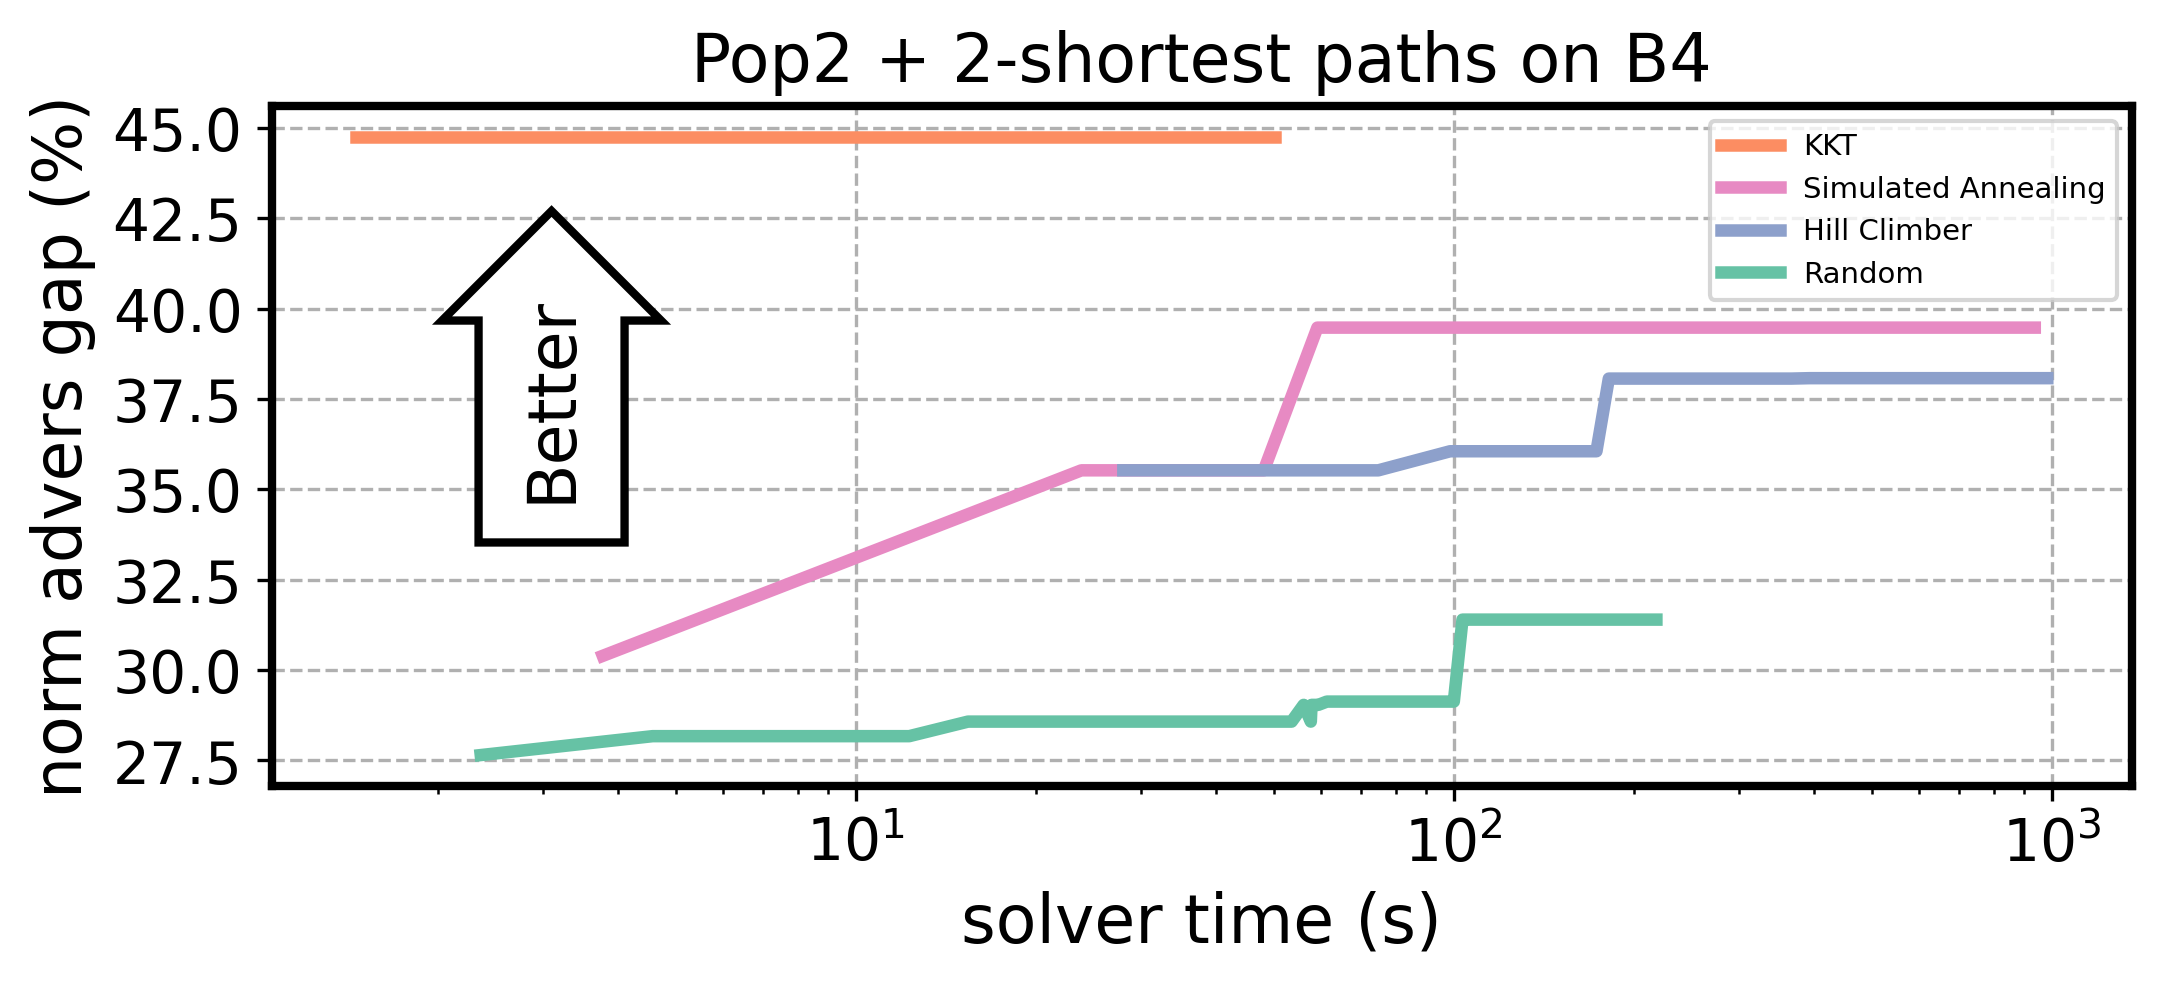

In [346]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
norm_factor = 38 * 5000
for idx, (approach, output) in enumerate(approach_to_dur_gap_mapping.items()):
    plt.plot(output[0], output[1] * 100/ norm_factor, label=approach, color=colors[idx], linestyle=line_styles[idx], 
            #  marker="o", 
            #  mfc="white", 
            #  mec=colors[idx], 
            #  markersize=10, 
             linewidth=3, 
            #  markeredgewidth=3
    )
# #add arrow to plot
# plt.arrow(x=4, y=0.75, dx=0, dy=0.1, width=0.5, head_length=0.03, fc="white") 

#add annotation
min_y = 0.375 * 100
# plt.annotate('Better', xy = (3.1, min_y - 0.1))
bbox_props = dict(boxstyle="rarrow", ec="black", fc="white", lw=2)
t = plt.text(3.1, min_y, "Better", ha="center", va="center", rotation=90,
            size=16,
            bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.legend(fontsize=7, loc="upper right")
plt.title("Pop2 + 2-shortest paths on B4", fontsize=16)
plt.xlabel("solver time (s)", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "_pop2_2sp.jpg", bbox_inches="tight", format="jpg", dpi=300)